In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import vstack, csc_matrix

In [8]:
with open("data/aclImdb/imdb.vocab") as f:
    vocab = f.read().split("\n")

import glob
def get_data(which="train"):
    X_pos = glob.glob(f"data/aclImdb/{which}/pos/*")
    X_neg = glob.glob(f"data/aclImdb/{which}/neg/*")

    cv = CountVectorizer(input="filename", vocabulary=vocab)

    X = vstack([
        cv.transform(X_pos),
        cv.transform(X_neg)
    ])
    y = np.array([1]* 25_000 + [-1] * 25_000)
    return X, y

X_train, y_train = get_data("train")
X_test, y_test = get_data("test")

In [9]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [10]:
X, y, cv =  get_spam_training_data("data/sms_train.csv", ['0', '1'],",")
y = (np.array(y) == '1') * 2 - 1
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = csc_matrix(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=137)

In [15]:
def accuracy_score_svm(w, X, y):
    return np.mean((((w @ X.T > 0) * 2).todense() - 1) == y)

In [12]:
from sklearn.svm import LinearSVC
import warnings
from time import time

warnings.filterwarnings("ignore") # intentional non-convergence

liblinear_times = []
liblinear_scores = []

for i in range(100):
    m = LinearSVC(C=1, max_iter=i, fit_intercept=False)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    liblinear_times.append(
        time_used
    )
    liblinear_scores.append(
        accuracy_score_svm(m.coef_, X_test, y_test)
    )

In [16]:
from sklearn.svm import SVC

libsvm_times = []
libsvm_scores = []

for i in range(200):
    print(i, end="\r")
    m = SVC(kernel="linear", C=1, max_iter=i)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    libsvm_times.append(
        time_used
    )
    libsvm_scores.append(
        accuracy_score_svm(m.coef_, X_test, y_test)
    )

In [25]:
from Algorithm import CoordinateDescent
import importlib
del CoordinateDescent
import Algorithm
importlib.reload(Algorithm)
from Algorithm import CoordinateDescent

In [26]:
cd = CoordinateDescent(C=1., eps=1e-3)

w = cd.fit_process(X_train, y_train)
whist = cd.w_history

2023-06-13T21:37:45.731029 0 3063.0
2023-06-13T21:37:54.903581 1 82.67504481548562
2023-06-13T21:38:03.726930 2 132.56865853789708
2023-06-13T21:38:12.479994 3 90.50643993875676
2023-06-13T21:38:21.361332 4 92.88769133552938
2023-06-13T21:38:30.518736 5 91.42647344729453
2023-06-13T21:38:39.531163 6 91.32306872514431
2023-06-13T21:38:48.546953 7 91.20535598375517
2023-06-13T21:38:57.305762 8 91.2349114681783
2023-06-13T21:39:06.063695 9 91.15555490571829
2023-06-13T21:39:15.044281 10 91.14894706410212
2023-06-13T21:39:24.065893 11 91.12578804253386
2023-06-13T21:39:33.398820 12 91.1156439073913
2023-06-13T21:39:42.552944 13 91.10118738496801
2023-06-13T21:39:51.480915 14 91.10301740516786
2023-06-13T21:40:00.175233 15 91.09274226076397
2023-06-13T21:40:08.938656 16 91.09385070131432
2023-06-13T21:40:18.088293 17 91.09170766524045


In [27]:
logs = """
2023-06-13T21:37:45.731029 0 3063.0
2023-06-13T21:37:54.903581 1 82.67504481548562
2023-06-13T21:38:03.726930 2 132.56865853789708
2023-06-13T21:38:12.479994 3 90.50643993875676
2023-06-13T21:38:21.361332 4 92.88769133552938
2023-06-13T21:38:30.518736 5 91.42647344729453
2023-06-13T21:38:39.531163 6 91.32306872514431
2023-06-13T21:38:48.546953 7 91.20535598375517
2023-06-13T21:38:57.305762 8 91.2349114681783
2023-06-13T21:39:06.063695 9 91.15555490571829
2023-06-13T21:39:15.044281 10 91.14894706410212
2023-06-13T21:39:24.065893 11 91.12578804253386
2023-06-13T21:39:33.398820 12 91.1156439073913
2023-06-13T21:39:42.552944 13 91.10118738496801
2023-06-13T21:39:51.480915 14 91.10301740516786
2023-06-13T21:40:00.175233 15 91.09274226076397
2023-06-13T21:40:08.938656 16 91.09385070131432
2023-06-13T21:40:18.088293 17 91.09170766524045
"""
datetimes = [entry.split()[0] for entry in logs.split("\n")[1:-1]]
import datetime
ts = [
    datetime.datetime.fromisoformat(dt_str).timestamp()
    for dt_str in datetimes
]
our_times = (np.array(ts) - ts[0])
our_times

array([  0.        ,   9.17255187,  17.99590087,  26.74896502,
        35.63030291,  44.78770685,  53.80013394,  62.81592393,
        71.57473302,  80.33266592,  89.31325197,  98.3348639 ,
       107.66779089, 116.82191491, 125.74988604, 134.44420385,
       143.20762706, 152.35726404])

In [29]:
def accuracy_score_svm(w, X, y):
    return np.mean((((w @ X.T > 0) * 2) - 1) == y)
our_implementation = [
    accuracy_score_svm(np.zeros(X_test.shape[1]), X_test, y_test)
] + [
    accuracy_score_svm(w, X_test, y_test)
    for w in whist
]

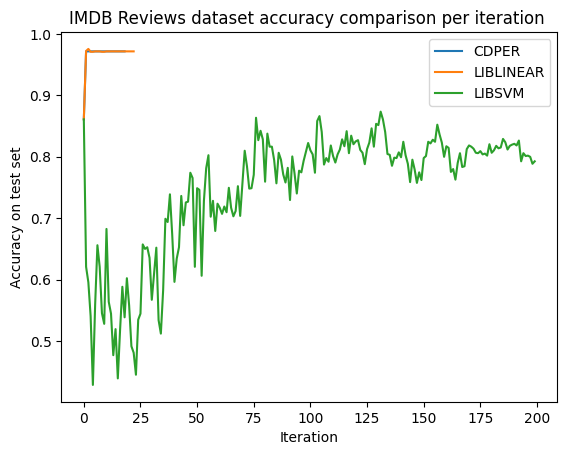

In [30]:
import matplotlib.pyplot as plt
plt.plot(our_implementation)
plt.plot(liblinear_scores)
plt.plot(libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Iteration")
plt.ylabel("Accuracy on test set")
plt.title("IMDB Reviews dataset accuracy comparison per iteration ")
plt.show()

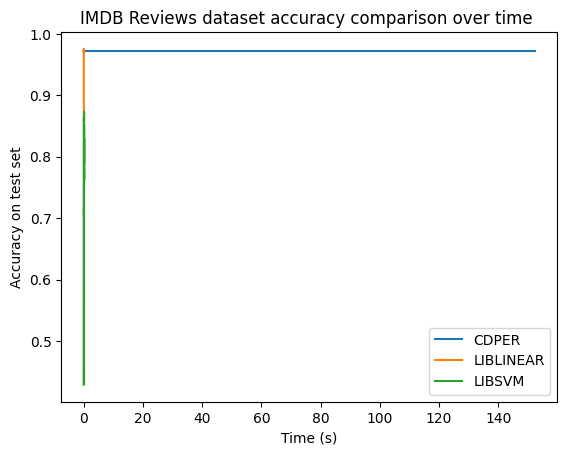

In [31]:
plt.plot(our_times, our_implementation[1:])
plt.plot(liblinear_times, liblinear_scores)
plt.plot(libsvm_times, libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Time (s)")
plt.ylabel("Accuracy on test set")
plt.title("IMDB Reviews dataset accuracy comparison over time ")
plt.show()